# Analysing Australias Wildfire Data

## Exploring the Data

Dataset: Historical Wildfires
This wildfire dataset contains data on fire activities in Australia starting from 2005. 

Ill be exploring the following variables:
* Region: the 7 states withing Australia
* Date: in UTC and provide the data for 24 hours ahead
* Estimated_fire_area: daily sum of estimated fire area for presumed vegetation fires with a confidence > 75% for a each region in km2
* Mean_estimated_fire_brightness: daily mean (by flagged fire pixels(=count)) of estimated fire brightness for presumed vegetation fires with a confidence level > 75% in Kelvin
* Mean_estimated_fire_radiative_power: daily mean of estimated radiative power for presumed vegetation fires with a confidence level > 75% for a given region in megawatts
* Mean_confidence: daily mean of confidence for presumed vegetation fires with a confidence level > 75%
* Std_confidence: standard deviation of estimated fire radiative power in megawatts
* Var_confidence: Variance of estimated fire radiative power in megawatts
* Count: daily numbers of pixels for presumed vegetation fires with a confidence level of larger than 75% for a given region
* Replaced: Indicates with an Y whether the data has been replaced with standard quality data when they are available (usually with a 2-3 month lag). Replaced data has a slightly higher quality in terms of locations


In [2]:
%pip install seaborn
%pip install folium
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import requests
from io import StringIO

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"

response = requests.get(URL)

# Ensure the request was successful
response.raise_for_status()

# Use StringIO to convert the text data to a file-like object so it can be read into a pandas dataframe
data = StringIO(response.text)
df = pd.read_csv(data)

print('Data read into a pandas dataframe!')



Data read into a pandas dataframe!


In [4]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [5]:
import datetime as dt

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

## Understanding the change in average estimated fire area over time:

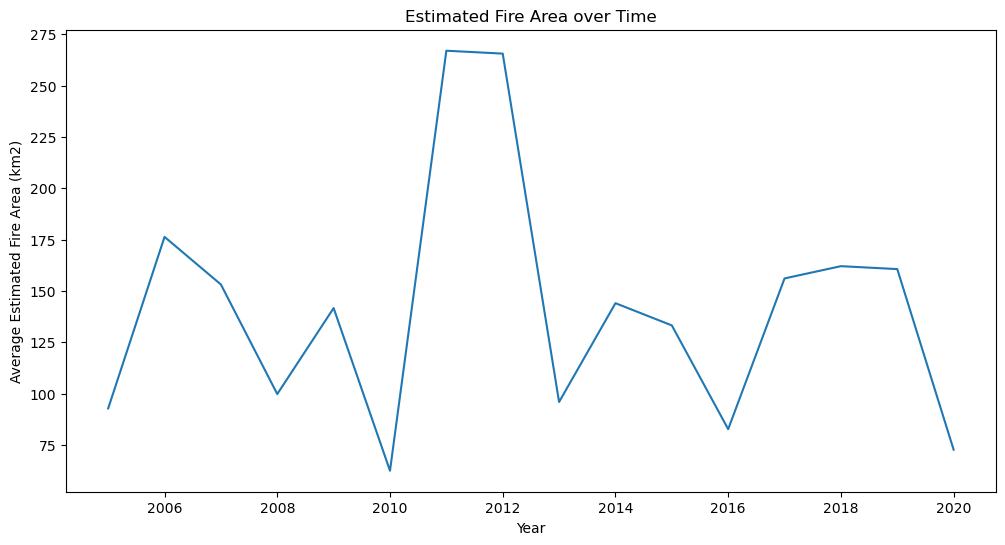

In [6]:
plt.figure(figsize=(12, 6))
df_new=df.groupby('Year')['Estimated_fire_area'].mean()
df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area (km2)')
plt.title('Estimated Fire Area over Time')
plt.show()

## Let's visualise  the portion of count of pixels for presumed vegetation fires vary across regions we will develop a pie chart for this:

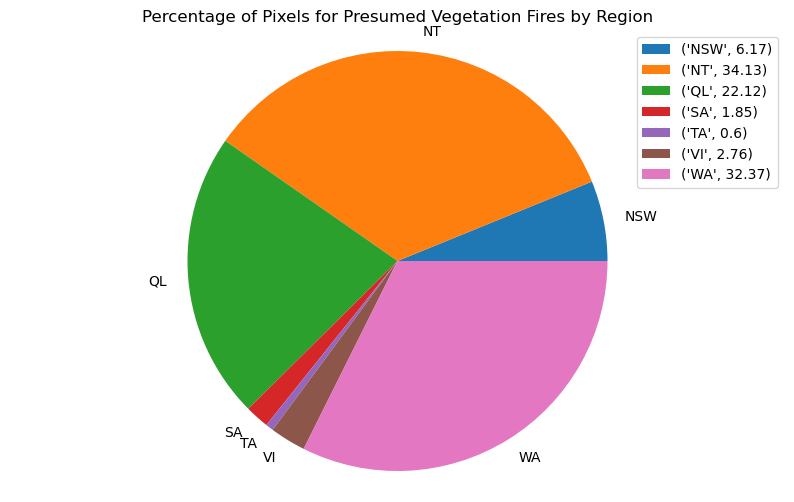

In [8]:
plt.figure(figsize=(10, 6))
region_counts = df.groupby('Region')['Count'].sum()
plt.pie(region_counts, labels=region_counts.index)
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.legend([(i,round(k/region_counts.sum()*100,2)) for i,k in zip(region_counts.index, region_counts)])
plt.axis('equal')
plt.show()

##  Lets understand the distribution of estimated fire brightness across regions using a stacked Histogram plot with seaborn:

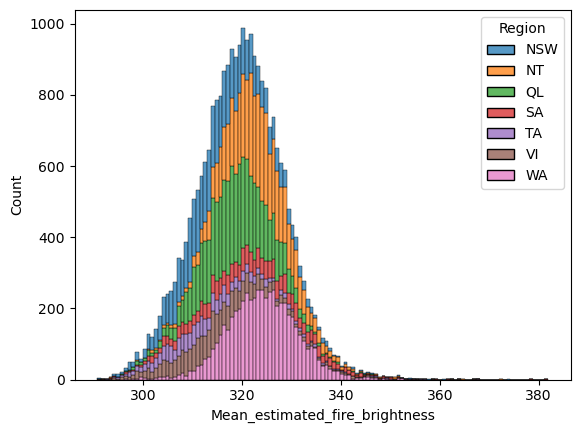

In [9]:
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', multiple='stack')
plt.show()

## Let's see if there is any correlation between mean estimated fire radiative power and mean confidence level utilizing a scatter plot:

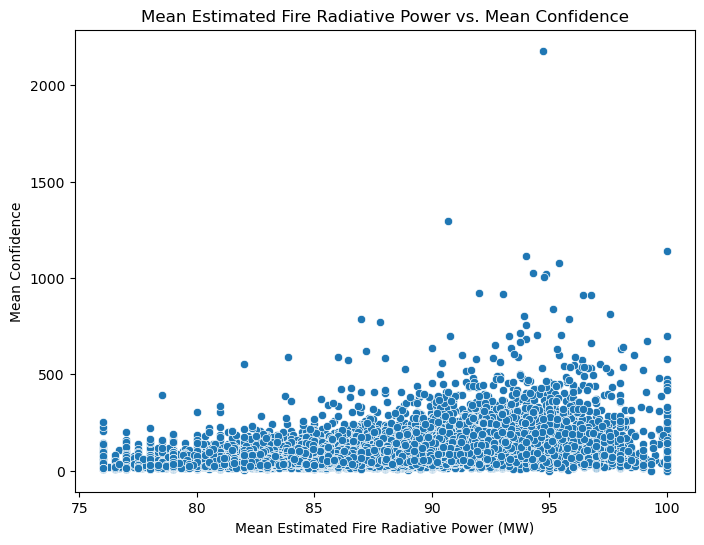

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Mean_confidence', y='Mean_estimated_fire_radiative_power')
plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
plt.ylabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
plt.show()